**решающее дерево, регрессия**

Евгений Борисов <esborisov@sevsu.ru>

---

Yury Kashnitsky   Классификация, деревья решений и метод ближайших соседей   
https://habr.com/ru/companies/ods/articles/322534/

# генерируем набор данных

In [1]:
import numpy as np
import numpy.random as rng
from matplotlib import pyplot as plt

np.set_printoptions(precision=2)

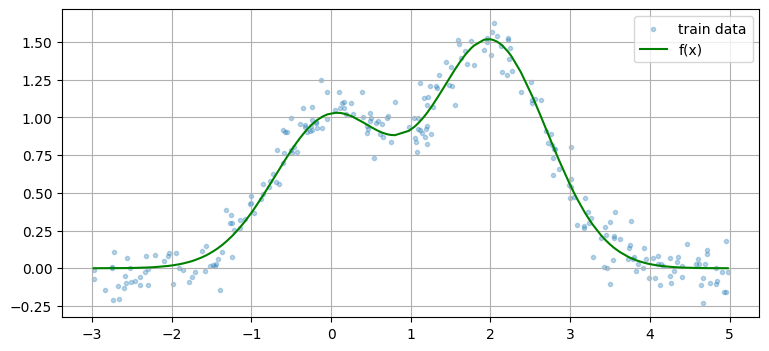

In [2]:
# f,xlim = (lambda x: np.sin(x*2.9)),(-1.,+2.)
# f,xlim = lambda x: np.sin(x*2.9)+np.cos(x*5.9),(-1,1)
f,xlim = lambda x: np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2), (-3,5)

def generate(f, xlim=(-1.,1.), n_samples=256, noise=.1 ):
    assert len(xlim)==2
    assert xlim[0]<xlim[1]
    assert n_samples>2
    assert 0.<noise<1.
    x = np.sort( rng.rand(n_samples)*(xlim[1]-xlim[0]) + xlim[0] )
    return x.reshape(-1,1), ( f(x)+rng.normal(0.,noise,n_samples) ).reshape(-1,1)

X_train,y_train = generate(f=f,xlim=xlim)

# рисуем результат
fig,ax = plt.subplots(figsize=(9,4))
ax.scatter(x=X_train,y=y_train,alpha=.3,marker='.',label='train data') # точки учебного набора
ax.plot(X_train,f(X_train),c='g',label='f(x)')
ax.grid()
ax.legend()

# обучаем модель

In [3]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5).fit(X_train,y_train,)

## визуализация дерева

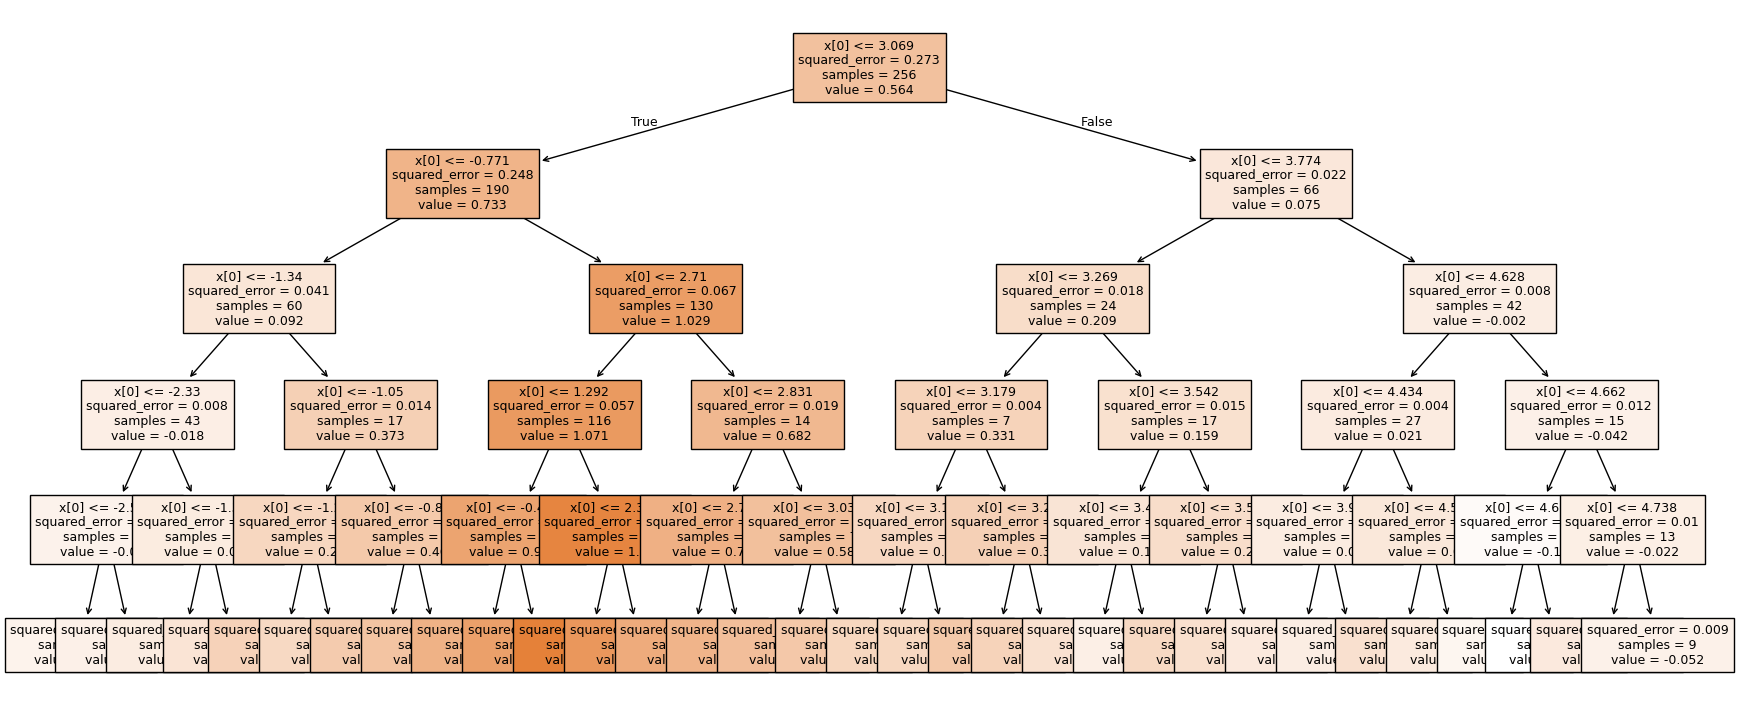

In [6]:
from sklearn.tree import plot_tree

fig,ax = plt.subplots(figsize=(21,9))
plot_tree( model, fontsize=9, filled=True, max_depth=8, ax=ax, ) 
plt.show()

## тестируем

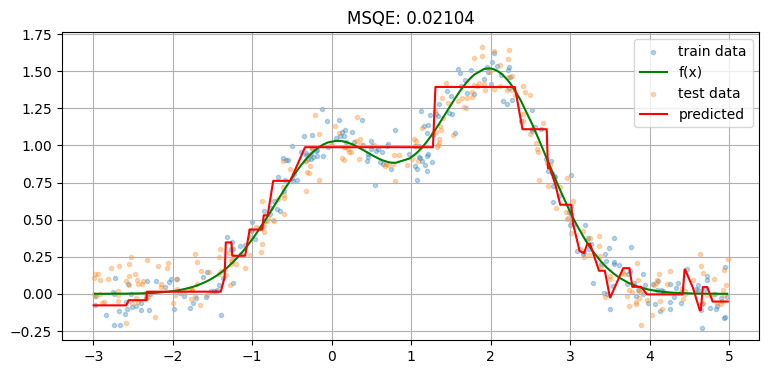

In [7]:
X_test,y_test = generate(f=f,xlim=xlim)

predicted = model.predict(X_test)

from sklearn.metrics import mean_squared_error

# рисуем результат
fig,ax = plt.subplots(figsize=(9,4))
ax.scatter(x=X_train,y=y_train,alpha=.3,marker='.',label='train data') # точки учебного набора
ax.plot(X_train,f(X_train),c='g',label='f(x)')
ax.scatter(x=X_test,y=y_test,alpha=.3,marker='.',label='test data') # точки учебного набора
ax.plot(X_test,predicted,c='r',label='predicted')
ax.set_title(f'MSQE: {mean_squared_error(y_true=y_test,y_pred=predicted):.5f}')
# ax.set_xlim(X_test.min()-.1,X_test.max()+.1)
ax.set_ylim(y_test.min()-.1,y_test.max()+.1)
ax.grid()
ax.legend()